# Example : non stabel SIR model 

This file contains the example of a (simple) mean field model of an SIR dynamics that has a unique fixed point that is not always exponentially stable (depending on the parameters "a" of the model). 

- For steady-state expectation, the refined mean field approximation cannot be applied when the fixed point is not expoentially stable. 
- We also show in this case, some problems arrise even for the transient regime

In [1]:
# To load the library
import src.rmf_tool as rmf
import time 

import importlib
importlib.reload(rmf)

# to numerically integrate the ODE
import scipy.integrate as integrate

# To plot the results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import mpld3
    mpld3.enable_notebook()
except ImportError:
    print('Module mpld3 not found')
    pass


In [2]:
# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP() 
# We then add the three transitions : 
ddpp.add_transition([-1,1],lambda x: x[0]*(1 + 10*x[1]/(a+x[0])))
ddpp.add_transition([0,-1],lambda x: 5*x[1])
ddpp.add_transition([1,0],lambda x: (10*x[0] + 0.1)*(1-x[0]-x[1]))
#ddpp.add_transition([1,0,-1],lambda x: (10*x[0] + 0.1)*x[2])
#(1-x[0]-x[1]))
#x[2])


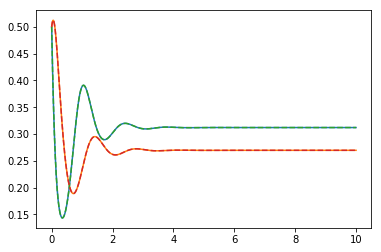

In [3]:
ddpp.set_initial_state([.5,.5])
a=0.5
T,X = ddpp.ode(time=10)
plt.plot(T,X,'-')

# The code below should give the same curve
T,X2 = ddpp.meanFieldExapansionTransient(order=0,time=10)
plt.plot(T,X2,'--')


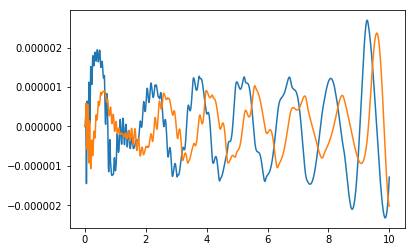

In [4]:
plt.plot(T,X-X2)

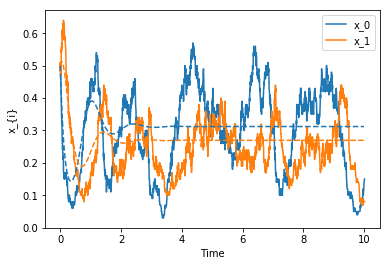

In [5]:
ddpp.plot_ODE_vs_simulation(N=100,time=10)

In [6]:
%time ddpp.fixed_point() #(N=10)
%time ddpp.theoretical_V()

CPU times: user 10.6 ms, sys: 2.6 ms, total: 13.2 ms
Wall time: 11.1 ms
CPU times: user 110 ms, sys: 3.09 ms, total: 113 ms
Wall time: 113 ms


array([ 1.28376883, -1.32697402])

## Refined mean field ($O(1/N)$ and $O(1/N^2)$-expansion) and comparison with simulations


In [7]:
from misc.SIR_simulate.averageSIR import *

In [8]:
a=0.5
%time T,XVW = ddpp.meanFieldExapansionTransient(order=1,time=15)
%time T,XVWABCD = ddpp.meanFieldExapansionTransient(order=2,time=15) # note : this code also recomputes XVW above

CPU times: user 331 ms, sys: 5.49 ms, total: 336 ms
Wall time: 342 ms
CPU times: user 2.11 s, sys: 9.53 ms, total: 2.12 s
Wall time: 2.14 s


50 0.5 computed in  0.001827239990234375 seconds


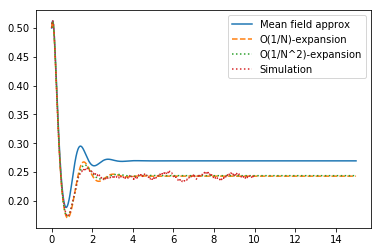

In [9]:
i=1
n=2
N=50
plt.plot(T,XVW[:,i],'-')
plt.plot(T,XVW[:,i]+XVW[:,i+n]/N,'--')
plt.plot(T,XVW[:,i]+XVW[:,i+n]/N+XVWABCD[:,i+2*n+n**2]/N**2,':')
Tsimu,Ssimu,Isimu = averageTraj(N,a,1000)
plt.plot(Tsimu,Isimu,':')
plt.legend(('Mean field approx','O(1/N)-expansion', 'O(1/N^2)-expansion','Simulation'))


### Figure for paper (unstable SIR model)

200 0.1 computed in  0.001741170883178711 seconds
500 0.1 computed in  0.0031270980834960938 seconds
1000 0.1 computed in  0.0015850067138671875 seconds
200 0.5 computed in  0.001641988754272461 seconds
500 0.5 computed in  0.0016629695892333984 seconds
1000 0.5 computed in  0.00179290771484375 seconds


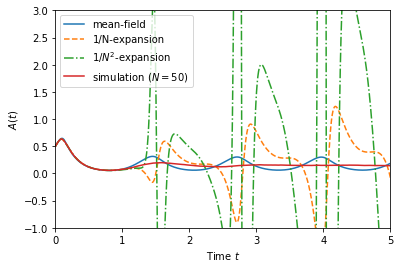

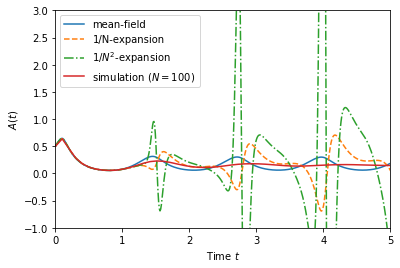

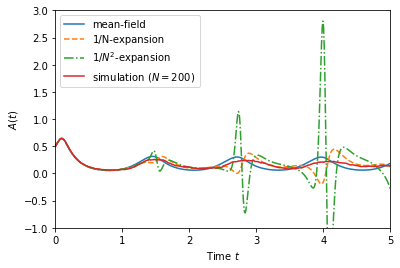

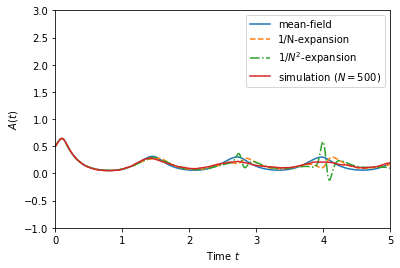

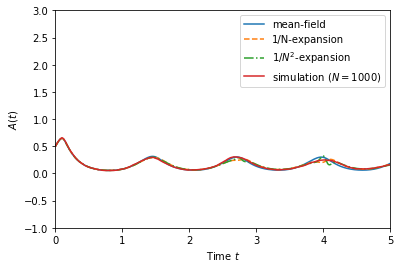

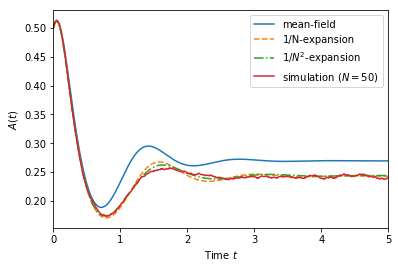

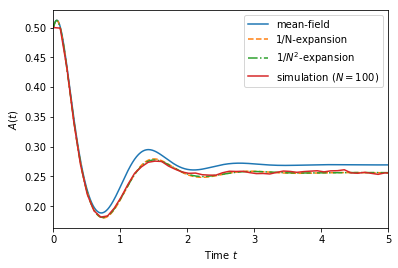

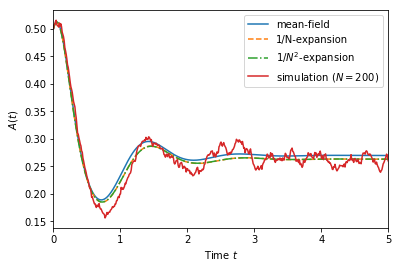

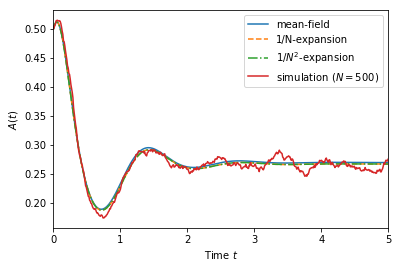

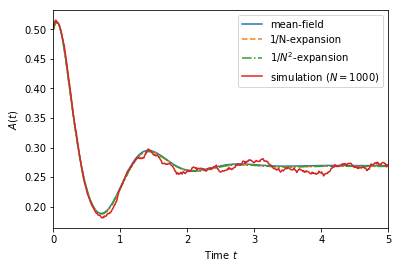

In [10]:
for a in [0.1,0.5]:
  T,XVWABCD = ddpp.meanFieldExapansionTransient(order=2)
  #for N in [20,50]:
  for N in [50,100,200,500,1000]:
    f = plt.figure()
    i=1
    n=2
    plt.plot(T,XVWABCD[:,i])
    plt.plot(T,XVWABCD[:,i]+XVWABCD[:,i+n]/N,'--')
    plt.plot(T,XVWABCD[:,i]+XVWABCD[:,i+n]/N+XVWABCD[:,i+2*n+n**2]/N**2,'-.')
    Tsimu,Ssimu,Isimu = averageTraj(N,a,10)
    if i==0:
        plt.plot(Tsimu,Ssimu)
    else:
        plt.plot(Tsimu,Isimu)
    plt.legend(('mean-field','1/N-expansion','$1/N^2$-expansion','simulation ($N={}$)'.format(N)))
    plt.xlim([0,5])
    if a==0.1:
        plt.ylim([-1,3])
    if i==1:
        plt.ylabel('$A(t)$')
    elif i==0:
        plt.ylabel('$D(t)$')
    plt.xlabel('Time $t$')
    #pi = ddpp.fixed_point() #(N=10)
    #V = ddpp.theoretical_V()
    #print(N,pi+V/N)
    f.savefig('SIR_a0{}_N{}.pdf'.format(int(a*10),N),bbox_inches='tight')


50 0.1 computed in  0.0017731189727783203 seconds
50 0.5 computed in  0.0016849040985107422 seconds


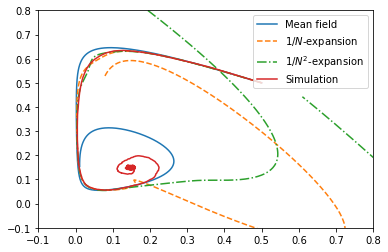

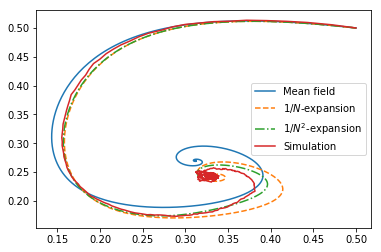

In [12]:

N=50

for a in [0.1,0.5]:
    if a == 0.1:
        T,XVWABCD = ddpp.meanFieldExapansionTransient(order=2,time=1.7)
    else:
        T,XVWABCD = ddpp.meanFieldExapansionTransient(order=2,time=5)
        
    Tsimu,Ssimu,Isimu = averageTraj(N,a,1000)
    #s,i = ddpp.simulate(N,time=5)
    
    f=plt.figure()
    plt.plot(XVWABCD[:,0],XVWABCD[:,1])
    plt.plot(XVWABCD[:,0]+XVWABCD[:,n]/N,
             XVWABCD[:,1]+XVWABCD[:,1+n]/N,'--')
    plt.plot(XVWABCD[:,0]+XVWABCD[:,n]/N+XVWABCD[:,2*n+n**2]/N**2,
             XVWABCD[:,1]+XVWABCD[:,1+n]/N+XVWABCD[:,1+2*n+n**2]/N**2,'-.')
    plt.plot(Ssimu,Isimu)
    plt.legend(('Mean field', '$1/N$-expansion','$1/N^2$-expansion','Simulation'))
    if a==0.1:
        plt.xlim([-.1,.8])
        plt.ylim([-.1,.8])
    f.savefig('SIR_2D_a0{}_N{}'.format(int(10*a),N),bbox_inches='tight')


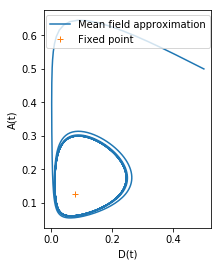

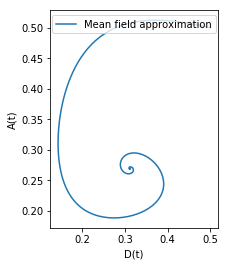

In [13]:
for a in [0.1,0.5]:
    f = plt.figure()
    f.set_size_inches(3,4)
    plt.xlabel('D(t)')
    plt.ylabel('A(t)')
    t,x=ddpp.ode(time=10)
    plt.plot(x[:,0],x[:,1])
    if a==0.1:
        plt.plot([0.078],[0.126],'+')
    plt.legend(('Mean field approximation','Fixed point'),loc='upper center')
    f.savefig('SIR_2D_a0{}.pdf'.format(int(a*10)),bbox_inches='tight')

# MISC, including old figures and test with steady-state

10 0.3 computed in  0.001844167709350586 seconds
50 0.3 computed in  0.0027577877044677734 seconds


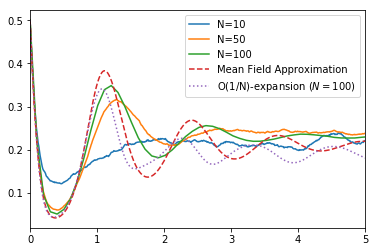

In [14]:
f = plt.figure()
a=0.3
myN = [10,50,100]
for N in myN:
    t,s,i = averageTraj(N,a,1000)
    plt.plot(t,s)
T,X = ddpp.ode(time=10)
plt.plot(T,X[:,0],'--')

T,XVW = ddpp.meanFieldExapansionTransient(time=10)
plt.plot(T,XVW[:,0]+XVW[:,3] / 100,':')
legds= ['N={}'.format(N) for N in myN]
legds.append('Mean Field Approximation')
legds.append('O(1/N)-expansion ($N=100$)')
plt.legend(legds)
plt.xlim([0,5])
f.savefig('SIR_a03.pdf',bbox_inches='tight')

In [15]:
a=0.3
i=1
T,XVW=ddpp.meanFieldExapansionTransient(time=1000)
print('  N & Mean-field & O(1/N)-expansion & Simulation')
for N in [10,20,30,50,100,500,1000,2000]:
    print('{:4d} & {:.3f}\t & {:.3f} \t\t& {:.3f}\\\\'.format(
        N, X[-1,i], X[-1,i]+XVW[-1,3+i]/N, steadyState(N,a)[i]) )
    
pi = ddpp.fixed_point()
for N in [10,20,30,50,100,500,1000,2000]:
    print(N,N*(steadyState(N,a)-pi))

  N & Mean-field & O(1/N)-expansion & Simulation
  10 & 0.242	 & 0.495 		& 0.122\\
  20 & 0.242	 & 0.368 		& 0.165\\
  30 & 0.242	 & 0.326 		& 0.186\\
  50 & 0.242	 & 0.292 		& 0.207\\
 100 & 0.242	 & 0.267 		& 0.224\\
 500 & 0.242	 & 0.247 		& 0.238\\
1000 & 0.242	 & 0.244 		& 0.240\\
2000 & 0.242	 & 0.243 		& 0.241\\
10 [ 0.04060385 -1.19354788]
20 [ 0.4767847  -1.53261115]
30 [ 0.83054955 -1.66581743]
50 [ 1.33953324 -1.75649188]
100 [ 1.97966649 -1.78721976]
500 [ 2.87901744 -1.91127381]
1000 [ 2.92981489 -2.01587762]
2000 [ 3.19966978 -1.95839524]


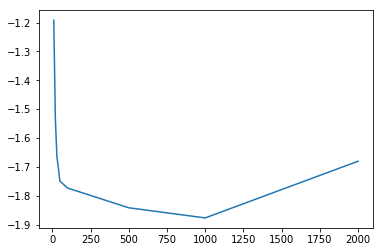

In [16]:
i=1
myN = [10,20,30,50,100,500,1000,2000]
mySS = [steadyState(N,a)[i] for N in myN]
plt.plot(myN,myN*(mySS-X[-1,i]))